In [22]:
from skimage.filters import gaussian 
from skimage.color import rgb2hsv, hsv2rgb
import cv2 as cv
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
import numpy as np
import sys
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from sklearn.model_selection import train_test_split
import sys
import os
import glob

import datetime as dt

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import cv2 as cv

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import tensorflow as tf
import tensorflow.keras as keras


In [2]:
def get_data(sites, input):
    processing = input.loc[input['site'].isin(sites)]
    #print(processing.columns)
    #labels = processing.drop(['id','filepath','site','shape','height','width','N_channels','aspect_ratio','animal_label'], axis=1)
    processing_back = processing.copy()
    labels = processing.drop(['id','filepath','site'], axis=1)
    images = []

    for index, row in processing.iterrows():  
        image_path = row['filepath']
        #print(index)
        #print(image_path)
        image = cv.imread(os.path.join('../data/', image_path))
        image = cv.resize(image, (960, 540))
        images.append(image)
        #if (index == 0):
            #images = np.empty((processing.shape[0],) + image.shape, dtype=image.dtype)
        #images[index] = image
    #print("out of for")
    images = np.array(images)
    #print("made it here")
    return images, labels, processing_back

In [3]:
import pandas as pd
train_labels = pd.read_csv('../data/train_labels.csv')
train_features = pd.read_csv('../data/train_features.csv')

train_merged = pd.merge(train_labels, train_features, on='id')
train_merged_back = train_merged.copy()

unique_sites = train_merged['site'].unique()

temp_df = train_merged.groupby("site").sum()
temp_df.drop("id", axis=1, inplace=True)
temp_df.drop("filepath", axis=1, inplace=True)
#print(temp_df)
#print(temp_df.columns)
total_sightings = temp_df.iloc[:, 1:].sum(axis=1).tolist()
unique_sites = pd.DataFrame({"site": unique_sites, "total_sightings": total_sightings})
unique_sites = unique_sites.sort_values(by="total_sightings", ascending=False)
#print(unique_sites)

In [4]:
trainsites = ["S0110","S0083","S0047","S0022","S0134","S0125","S0025","S0144","S0159","S0157"]
train_img, train_lbl, full_train = get_data(trainsites, train_merged_back)
testsites = ["S0097","S0119","S0062","S0017","S0056","S0035","S0197","S0170","S0155","S0124"]
test_img, test_lbl, full_test = get_data(testsites, train_merged_back)

#"S0110","S0083","S0047","S0022","S0134","S0125","S0025","S0144","S0159","S0157","S0068",
#"S0014","S0173","S0051","S0188","S0030","S0161","S0077","S0073","S0108","S0069","S0088",
#"S0092","S0074","S0070","S0185","S0122","S0013","S0031","S0026","S0024","S0198","S0182",
#"S0097","S0119","S0062","S0017","S0056","S0035","S0197","S0170","S0155","S0124","S0147",
#"S0141","S0104","S0008","S0120","S0167","S0117","S0133","S0043","S0127","S0137","S0191",
#"S0172","S0036","S0020","S0063","S0044","S0015","S0160","S0059","S0102","S0003","S0085",
#"S0186","S0192","S0076","S0136","S0027","S0150","S0038","S0050","S0061","S0016","S0130",
#"S0009","S0164","S0096","S0045","S0001","S0081","S0105","S0129","S0021","S0093","S0089",
#"S0113","S0049","S0010","S0176","S0112","S0153","S0095","S0071","S0175","S0190","S0123",
#"S0053","S0138","S0146","S0101","S0028","S0131","S0178","S0171","S0098","S0032","S0156",
#"S0174","S0196","S0183","S0143","S0018","S0019","S0042","S0080","S0006","S0177","S0148",
#"S0106","S0075","S0004","S0007","S0005","S0169","S0107","S0002","S0029","S0180","S0121",
#"S0060","S0054","S0184","S0179","S0139","S0079","S0078","S0115","S0163","S0084","S0046",
#"S0094","S0023","S0149","S0193","S0158"

In [5]:
unaug_model = tf.keras.models.load_model("mobilenet.keras")

In [6]:
Y_pred_test = unaug_model.predict(test_img)
Y_true_test = test_lbl

27/27 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step


In [7]:
Y_true_test = Y_true_test.to_numpy()

#print(Y_true_test)
#print(Y_pred_test)

#print(Y_true_test.shape)
#print(Y_pred_test.shape)

In [8]:
#create confusion matrix
a = np.argmax(Y_true_test, axis=1)
b = np.argmax(Y_pred_test, axis=1)
#print(a)
cm = confusion_matrix(b, a)

In [9]:
#print confusion matrix
print(cm)

[[103  26  63  22  28  54 106  54]
 [  0   0   0   0   0   0   0   0]
 [  0   0   3   0   0   0   0   0]
 [  4   0   7  35   0   0   0  44]
 [  0   0   1   0   0   0   0   0]
 [  0   0   0   0  14  10   0   0]
 [ 40  34  18  37   0   0  15 122]
 [  0   0   0   0   0   0   0   0]]


In [13]:
#show confusion matrix for unaugmented model
def show_confusion_matrix(model, test_images, true_labels):
   Y_pred_labels = model.predict(test_images)
   Y_true_test = true_labels.to_numpy()
   a = np.argmax(Y_pred_test, axis=1)
   b = np.argmax(Y_true_test, axis=1)
   cm = confusion_matrix(a, b)
   plt.matshow(cm)
   plt.colorbar()
   plt.ylabel('True Label')
   plt.xlabel('Predicted Label')
   for (i, j), z in np.ndenumerate(cm):
      plt.text(j, i, format(z, 'd'), ha='center', va='center', fontsize=8, bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))
   plt.show()

27/27 ━━━━━━━━━━━━━━━━━━━━ 124s 5s/step


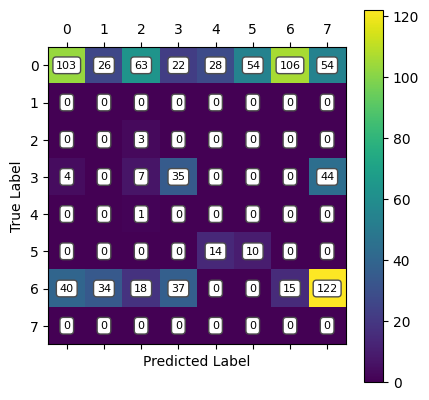

In [14]:
show_confusion_matrix(unaug_model, test_img, test_lbl)

In [15]:
#print(train_lbl.describe())
#print(full_test.describe())

In [16]:
#save inside of label_hogs all the rows from train_lbl where train_lbl["hog"] == 1
list_hogs = full_train[full_train["hog"] == 1]
#print(list_hogs.head())
hogs_labels = list_hogs.drop(['id','filepath','site'], axis=1)

images = []

for index, row in list_hogs.iterrows():  
    image_path = row['filepath']
    image = cv.imread(os.path.join('../data/', image_path))
    image = cv.resize(image, (960, 540))
    images.append(image)

hog_images = np.array(images)

In [17]:
print(len(hog_images))

93


In [18]:
flipped_hogs = []
for image in hog_images:
    flipped_image = np.flip(image, axis=1)
    flipped_hogs.append(flipped_image)
flipped_hogs = np.array(flipped_hogs)

In [23]:

gaussian_hogs = []
for image in hog_images:
    gaussian_hogs.append(gaussian(image, sigma=1.5))
gaussian_hogs = np.array(gaussian_hogs)


In [24]:
jittered_hogs = []
noise_red = np.random.randint(10, 50, size=image.shape[:2])
noise_green = np.random.randint(-20, -10, size=image.shape[:2])
noise_blue = np.random.randint(10, 50, size=image.shape[:2])
for image in hog_images:
    img_bak = image.copy()
    img_bak[:,:,0] += noise_red.astype(np.uint8)
    img_bak[:,:,1] += noise_green.astype(np.uint8)
    img_bak[:,:,2] += noise_blue.astype(np.uint8)
    img_bak = np.clip(img_bak, 0, 255)
    jittered_hogs.append(img_bak)
jittered_hogs = np.array(jittered_hogs)

In [ ]:
hogs_model = tf.keras.models.load_model("mobilenet.keras")
hogs_model.fit(flipped_hogs, )

In [19]:
#print(train_img.shape)
#print(train_lbl.shape)
#print(test_img.shape)
print(flipped_hogs.shape)
print(hogs_labels.shape)

(93, 540, 960, 3)
(93, 8)


In [35]:
#get CMs for different epochs on hogs 
def print_augment_effect(aug_imgs, aug_labels, test_imgs, test_lbls, epochs):
    for epoch in epochs:
        hogs_model = tf.keras.models.load_model("mobilenet.keras")
        for list_images in aug_imgs:
            hogs_model.fit(list_images, aug_labels, epochs=epoch, batch_size=32)
        show_confusion_matrix(hogs_model, test_imgs, test_lbls)
        del hogs_model
        

In [36]:
list_augs = []
list_augs.append(flipped_hogs)
list_augs.append(gaussian_hogs)
list_augs.append(jittered_hogs)

#print(jittered_hogs.shape)

3/3 ━━━━━━━━━━━━━━━━━━━━ 101s 31s/step - accuracy: 0.2692 - loss: 3.7269
3/3 ━━━━━━━━━━━━━━━━━━━━ 102s 33s/step - accuracy: 1.0000 - loss: 0.0499
3/3 ━━━━━━━━━━━━━━━━━━━━ 95s 32s/step - accuracy: 1.0000 - loss: 0.0077
27/27 ━━━━━━━━━━━━━━━━━━━━ 99s 4s/step


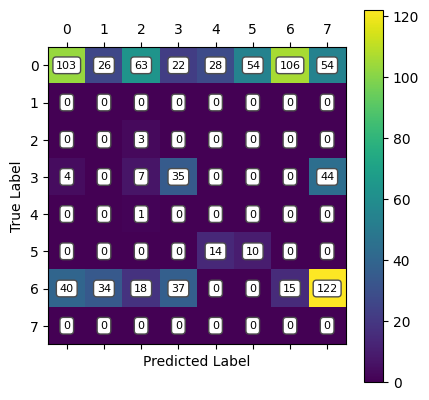

Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 98s 31s/step - accuracy: 0.2941 - loss: 3.7434
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 92s 30s/step - accuracy: 1.0000 - loss: 0.0362
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 120s 39s/step - accuracy: 1.0000 - loss: 2.7317e-04
Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 109s 34s/step - accuracy: 1.0000 - loss: 2.4466e-04
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 108s 36s/step - accuracy: 1.0000 - loss: 3.4219e-05
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 107s 33s/step - accuracy: 1.0000 - loss: 9.5335e-06
Epoch 1/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 102s 33s/step - accuracy: 1.0000 - loss: 6.2393e-07
Epoch 2/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 112s 35s/step - accuracy: 1.0000 - loss: 3.7266e-07
Epoch 3/3
3/3 ━━━━━━━━━━━━━━━━━━━━ 102s 33s/step - accuracy: 1.0000 - loss: 4.3784e-07
27/27 ━━━━━━━━━━━━━━━━━━━━ 114s 4s/step


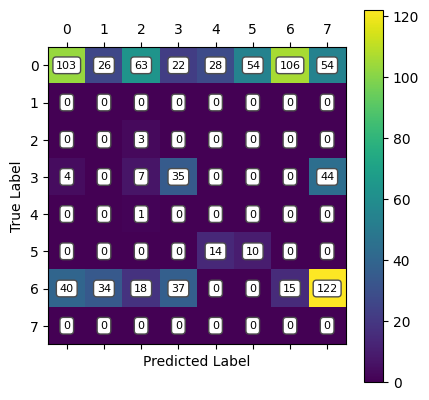

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 118s 35s/step - accuracy: 0.2971 - loss: 3.5670
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 103s 34s/step - accuracy: 1.0000 - loss: 0.0282
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 108s 35s/step - accuracy: 1.0000 - loss: 3.8285e-04
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 115s 35s/step - accuracy: 1.0000 - loss: 5.7277e-05
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 106s 33s/step - accuracy: 1.0000 - loss: 1.3270e-05
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 115s 35s/step - accuracy: 1.0000 - loss: 3.0585e-05
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 107s 35s/step - accuracy: 1.0000 - loss: 1.5921e-05
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 109s 35s/step - accuracy: 1.0000 - loss: 8.2811e-06
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 116s 37s/step - accuracy: 1.0000 - loss: 1.0161e-05
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 108s 35s/step - accuracy: 1.0000 - loss: 7.8321e-06
Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 103s 34s/step - accuracy: 1.0000 - loss: 1.0985e-06
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 103s 34s/step - 

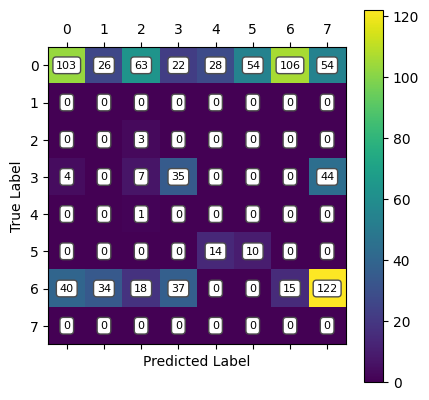

In [37]:
print_augment_effect(list_augs, hogs_labels, test_img, test_lbl, [1, 3, 5])

In [ ]:
#hogs_model = tf.keras.models.load_model("mobilenet.keras")
#hogs_model.fit(flipped_hogs, hogs_labels, epochs=5, batch_size=32)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 121s 36s/step - accuracy: 0.2404 - loss: 3.8048 
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 97s 32s/step - accuracy: 1.0000 - loss: 0.0479
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 85s 28s/step - accuracy: 1.0000 - loss: 8.6677e-04
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 86s 27s/step - accuracy: 1.0000 - loss: 3.5806e-04
Epoch 5/5
2/3 ━━━━━━━━━━━━━━━━━━━━ 30s 31s/step - accuracy: 1.0000 - loss: 1.7419e-04 

In [ ]:
#Y_pred_test = unaug_model.predict(test_img)
#Y_true_test = test_lbl